<a href="https://colab.research.google.com/github/allanzim/treinamento/blob/master/case_aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case exemplo


In [2]:
  %pip install sidetable

  import numpy as np
  import pandas as pd

  import sidetable
  from scipy import stats

  import seaborn as sns
  import matplotlib.pyplot as plt

  import plotly.express as px
  import plotly.graph_objects as go

  from ipywidgets import interact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Custom Settings

In [3]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

In [4]:
df = pd.read_csv('/content/ds_salaries.csv', index_col = 0)

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# checando variáveis e consumo de memória 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [7]:
# verificar a soma do uso de memória o df

memory1 = df.memory_usage().sum()

In [8]:
# vamos pegar todas as variáveis que sabemos que podem ser passadas para categóricas e transformar utilizando pandas - **próximo metodo!!!!**

categorical_columns = df.columns [df.dtypes == object].tolist() + ['work_year', 'remote_ratio'] # pega todas as variaveis que são categoricas e faz uma lista delas

categorical_columns

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size',
 'work_year',
 'remote_ratio']

In [9]:
# passar todas as colunas anteriores para categoricas

# pd.Categorical(df[categorical_columns]) - dessa forma precisa ser uma a uma

df[categorical_columns].astype('category') # dessa forma fazemos tudo de uma vez só, e o tipo da variavel passa a ser CATEGORY

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size,work_year,remote_ratio
0,MI,FT,Data Scientist,EUR,DE,DE,L,2020,0
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S,2020,0
2,SE,FT,Big Data Engineer,GBP,GB,GB,M,2020,50
3,MI,FT,Product Data Analyst,USD,HN,HN,S,2020,0
4,SE,FT,Machine Learning Engineer,USD,US,US,L,2020,50
...,...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M,2022,100
603,SE,FT,Data Engineer,USD,US,US,M,2022,100
604,SE,FT,Data Analyst,USD,US,US,M,2022,0
605,SE,FT,Data Analyst,USD,US,US,M,2022,100


In [10]:
# criando um dataframe com as variáveis categóricas

df[categorical_columns] = df[categorical_columns].astype('category')


In [11]:
# redução de memória utilizada no programa apenas alterando os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 28.4 KB


# Tratando os dados

In [12]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df.isna().sum().any()

False

In [14]:
df.duplicated().sum()

42

In [15]:
# o keep = false mantem os duplicados
# necessário verificar o quanto é normal ou não manter os valores duplicados

df[df.duplicated(keep = False)].sort_values(df.columns.tolist())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
119,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
367,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
...,...,...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
372,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
439,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
371,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M


In [16]:
# vamos escolher dropar os duplicados criando um novo dataframe para manter as informações iniciais

df_sem_duplicados = df.drop_duplicates()

df_sem_duplicados




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [17]:
# mantivemos as informações do dataframe inicial

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [18]:
# verifica variáveis numéricas!! - do df.info() - e agora as variáveis já estã convertidas do tipo object pro tipo category


df_sem_duplicados.select_dtypes('number').describe()

,salary,salary_in_usd
count,5.650000e+02,565.000000
mean,3.381160e+05,110610.343363
std,1.599879e+06,72280.702792
min,4.000000e+03,2859.000000
25%,6.700000e+04,60757.000000
50%,1.109250e+05,100000.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [19]:
# verifica variáveis categóricas - do df.info() - e agora as variáveis já estã convertidas do tipo object pro tipo category

# work_year - podemos verificar que são 3 anos possíveis - unique

# a moda é 2022 - *top*

# freq = quantas vezes a moda aparece 

# descrevendo dataframe de variáveis categóricas

df_sem_duplicados.select_dtypes('category').describe()



,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565,565
unique,3,4,4,50,17,57,3,50,3
top,2022,SE,FT,Data Scientist,USD,US,100,US,M
freq,278,243,546,130,359,295,346,318,290


In [20]:
# função da pandas que retorna a distribuição de frequência de maneira simples

df.experience_level.value_counts()


SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [21]:
# stb.freq é uma função do sidetable parecida com a value_coouts() da pandas, porém, bombada

df.stb.freq(['experience_level'])

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,280,46.128501,280,46.128501
1,MI,213,35.090610,493,81.219110
2,EN,88,14.497529,581,95.716639
3,EX,26,4.283361,607,100.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 28.4 KB


# Gráficos - Variáveis Categóricas


In [23]:
df_count = df_sem_duplicados.stb.freq(['experience_level'])

df_count

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


In [24]:
px.pie(df_count, values = 'count', names = 'experience_level')

In [25]:
# criação de grafico de pizza interativo  por categorias

@interact(categorical_column = ['experience_level', 'employment_type', 'remote_ratio', 'company_size'])
def pie_plot(categorical_column):

  df_count = df_sem_duplicados.stb.freq([categorical_column])
  fig = px.pie(df_count, values = 'count', names = categorical_column)
  fig.update_layout(title = dict(text =f'<b> {categorical_column} </b>', x = 0.5))
  fig.show()




interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

In [26]:
# criação de grafico interativo  por categorias

@interact(categorical_column = categorical_columns)
def pie_plot(categorical_column):

  df_count = df_sem_duplicados.stb.freq([categorical_column])
  fig = px.bar(df_count, y = 'count', x = categorical_column)
  fig.update_layout(title = dict(text =f'<b> {categorical_column} </b>', x = 0.5))
  fig.show()



interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

# Gráficos - Variáveis Numéricas

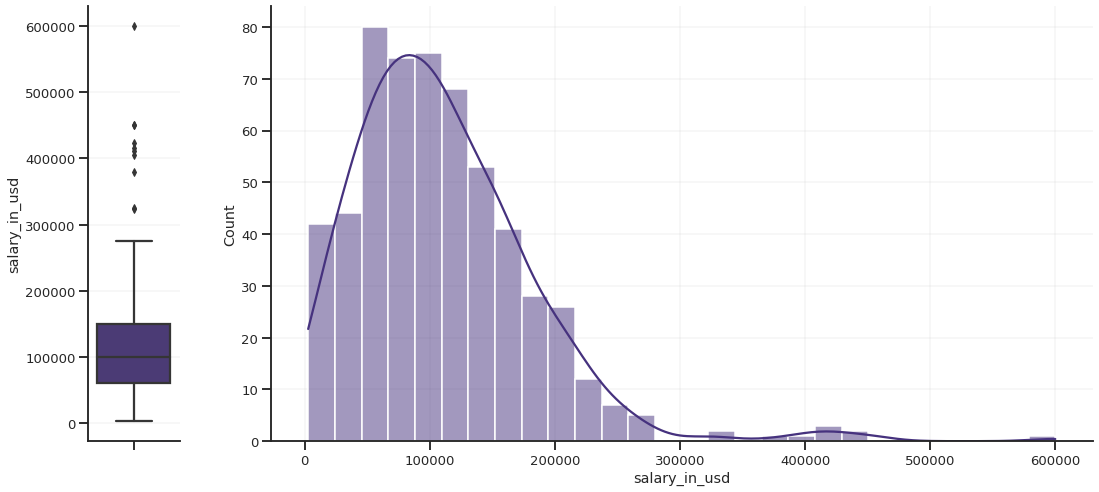

In [27]:
fig, axes = plt.subplots(ncols = 2, figsize = (18,8), gridspec_kw = {'width_ratios': [0.1,0.9]})

sns.boxplot(data = df_sem_duplicados, y = 'salary_in_usd', ax=axes[0])
sns.histplot(data = df_sem_duplicados, x = 'salary_in_usd', kde = True, ax=axes[1])
sns.despine()
plt.show()

In [28]:
stats.skew(df_sem_duplicados.salary_in_usd)

1.7282336070348854

In [29]:
stats.kurtosis(df_sem_duplicados.salary_in_usd)

6.38414589529744

# Análise Multivariadas

In [30]:
px.box(df_sem_duplicados, x='experience_level', y = 'salary_in_usd')

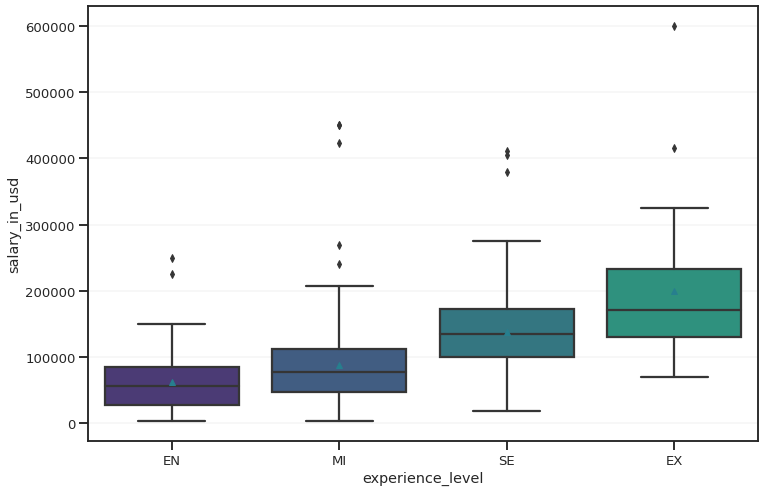

In [31]:
sns.boxplot(data = df_sem_duplicados, x = 'experience_level', y = 'salary_in_usd', order = ['EN', 'MI', 'SE', 'EX'], showmeans = True)

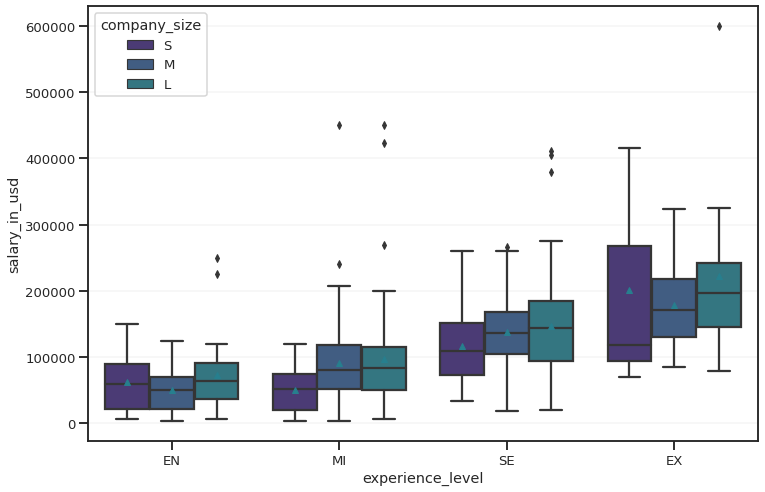

In [32]:
sns.boxplot(data = df_sem_duplicados, x = 'experience_level', y = 'salary_in_usd', hue = 'company_size', order = ['EN', 'MI', 'SE', 'EX'], hue_order = ['S', 'M', 'L'], showmeans = True)

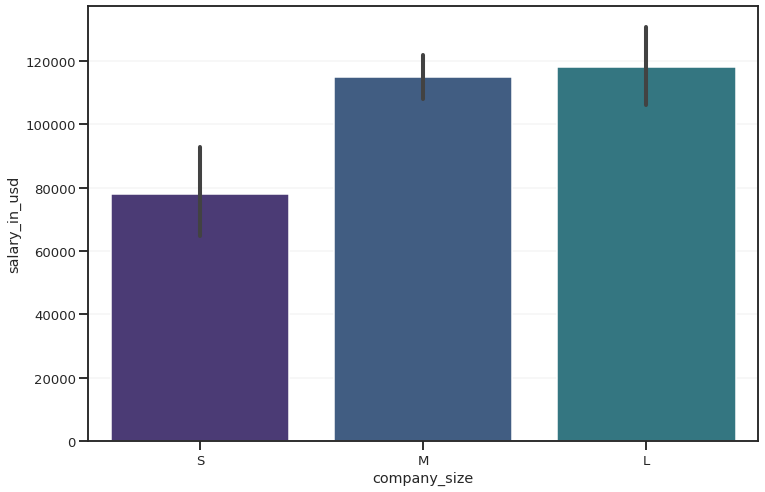

In [33]:
sns.barplot(data = df_sem_duplicados, x = 'company_size', y = 'salary_in_usd', order = ['S', 'M', 'L'])

In [34]:
crosstab = pd.crosstab(df_sem_duplicados['experience_level'], df_sem_duplicados['company_size']).loc[['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]




In [35]:
stats.contingency.association(crosstab)

0.1961418770417252

In [36]:
# retorna o chi2, p_valor, e os dof

# e um array de valores esperados

chi2, p, dof, expected = stats.chi2_contingency(crosstab)


In [37]:
# matriz de resíduos -> pegamos os valores observados da matriz de contingência - a matriz de valores esperados do chi2
(crosstab - expected).style.background_gradient(cmap='red')

ValueError: ignored

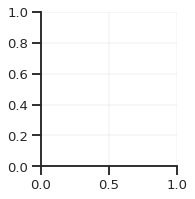

In [39]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)

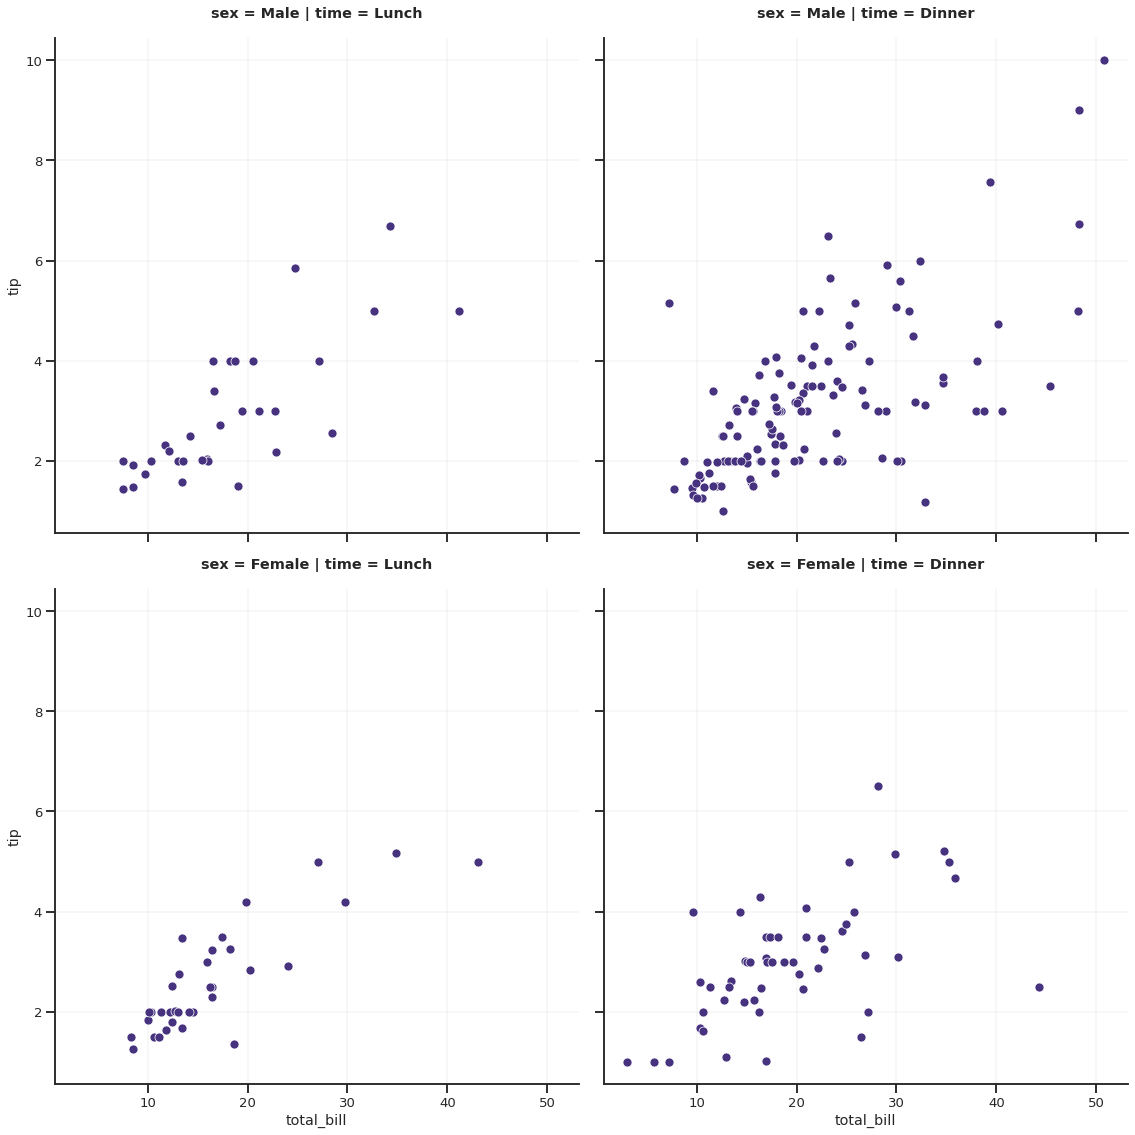

In [44]:

g = sns.FacetGrid(tips, col="time",  row="sex", height = 8)
g.map(sns.scatterplot, "total_bill", "tip")

In [47]:
@interact(x = df_sem_duplicados.columns.tolist(), y = df_sem_duplicados.columns.tolist())
def plot(x,y):
  sns.histplot(data = df_sem_duplicados, x = x, hue = y, palette = 'tab10', alpha = 0.2,);
  plt.title(f' {y} ~ {x} ')
  sns.despine()
  plt.show()



interactive(children=(Dropdown(description='x', options=('work_year', 'experience_level', 'employment_type', '…

In [48]:
px.box(df_sem_duplicados, x = 'remote_ratio', y = 'salary_in_usd')